In [20]:
%run importFunctions.ipynb

# Load the Benin dataset
benin_df = load_data('C:/Users/KIIT/Desktop/Wind-Solar-Analysis/data/benin-malanville.csv')

""" Summary Statistics """
print('Summary Statistics for Benin:')
print(summary_statistics(benin_df))

Summary Statistics for Benin:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.2000

In [21]:
""" Data Quality Check """
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
data_quality_check(benin_df, columns_to_check)


There are no missing values.

Incorrect Entries in GHI:
 0        -1.2
1        -1.1
2        -1.1
3        -1.1
4        -1.0
         ... 
525595   -5.5
525596   -5.5
525597   -5.5
525598   -5.5
525599   -5.5
Name: GHI, Length: 258847, dtype: float64

Incorrect Entries in DNI:
 0        -0.2
1        -0.2
2        -0.2
3        -0.1
4        -0.1
         ... 
525595   -0.1
525596   -0.1
525597   -0.1
525598   -0.1
525599   -0.1
Name: DNI, Length: 275987, dtype: float64

Incorrect Entries in DHI:
 0        -1.1
1        -1.1
2        -1.1
3        -1.0
4        -1.0
         ... 
525595   -5.9
525596   -5.8
525597   -5.8
525598   -5.8
525599   -5.7
Name: DHI, Length: 259182, dtype: float64
No incorrect entries in ModA.
No incorrect entries in ModB.
No incorrect entries in WS.
No incorrect entries in WSgust.

Outliers in GHI:
 671       1274.0
674       1349.0
676       1334.0
849       1253.0
850       1324.0
           ...  
522046    1218.0
522067    1218.0
522073    1218.0
522074

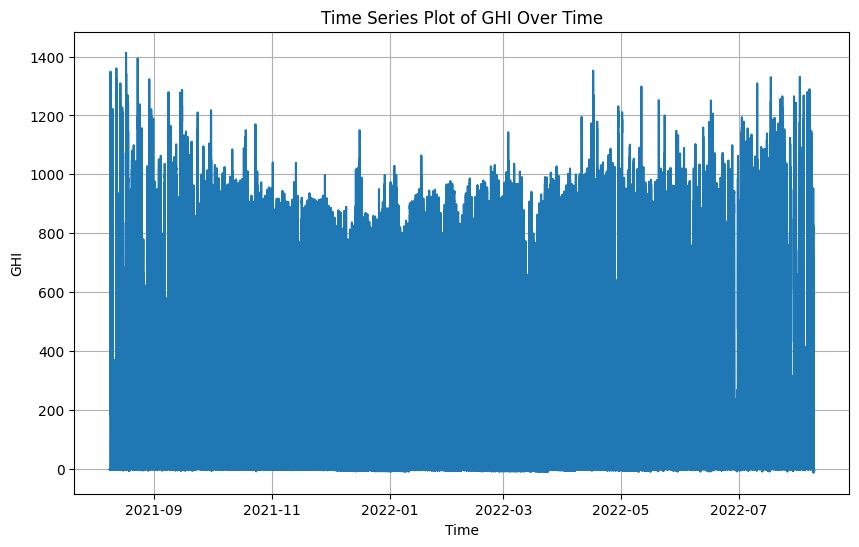

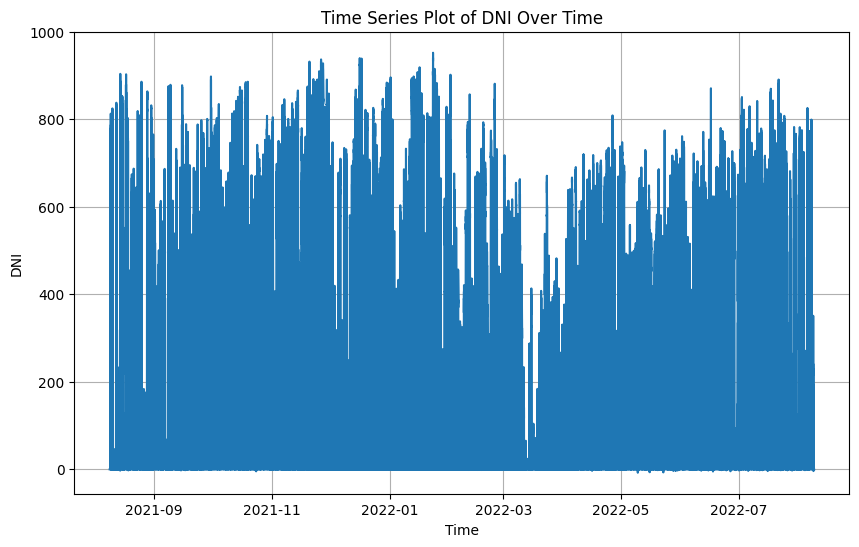

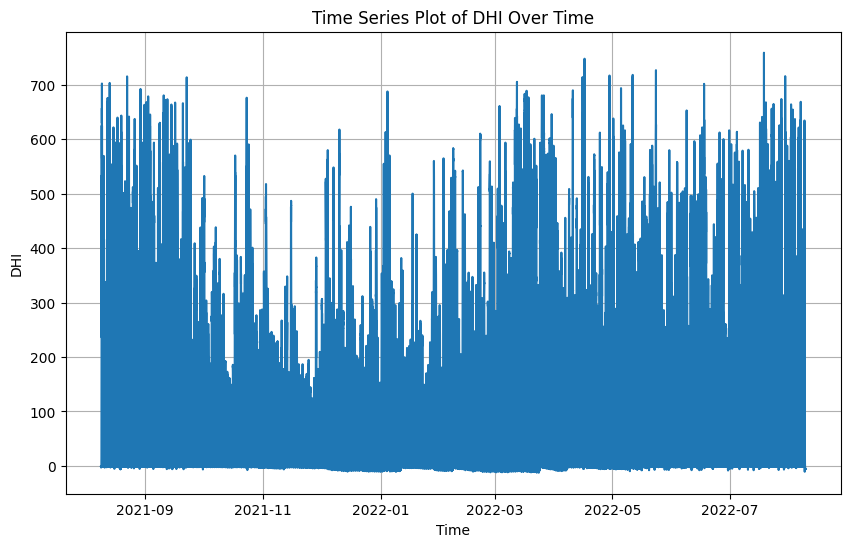

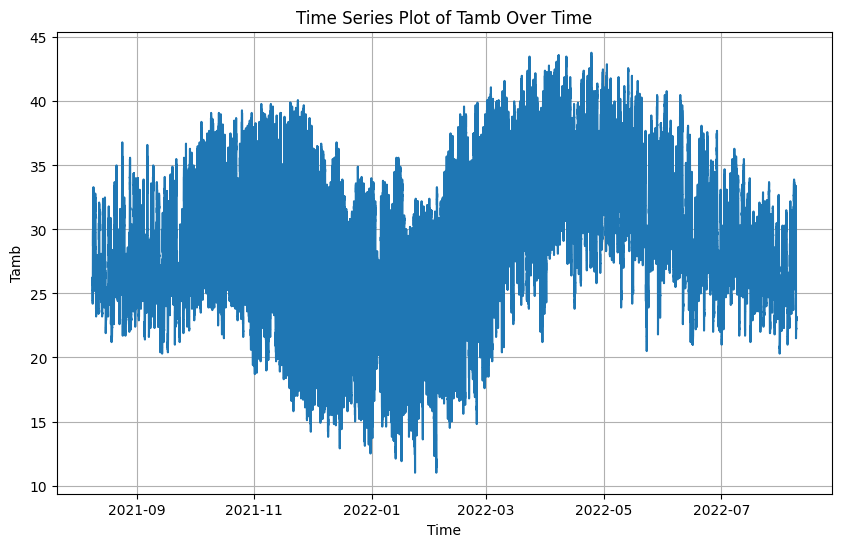

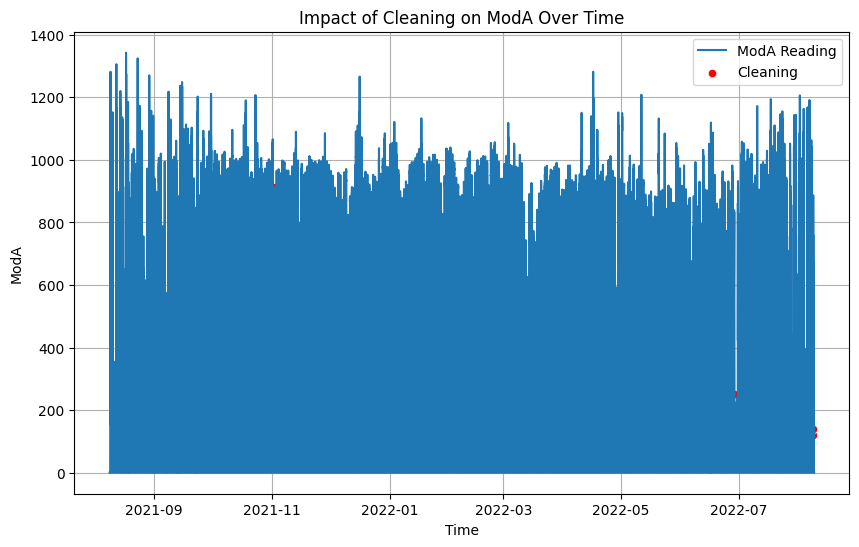

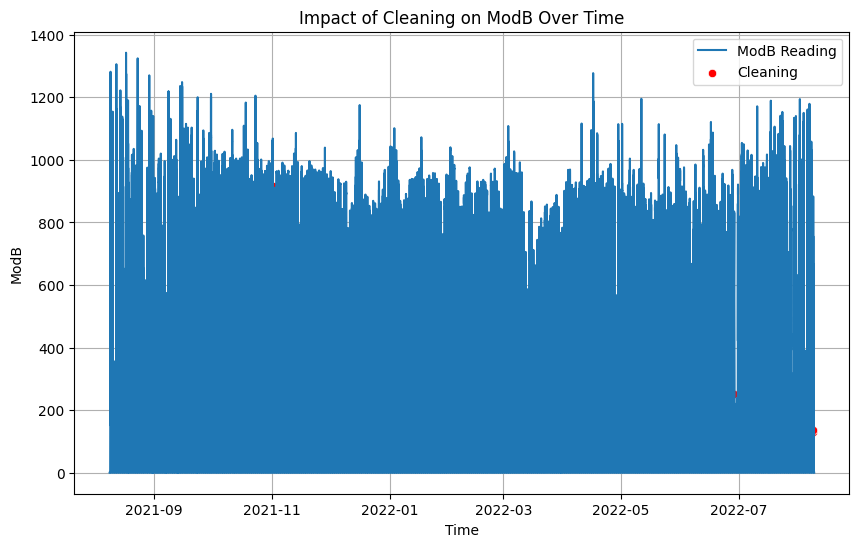

In [22]:
""" Time Series Analysis """

# Plot GHI, DNI, DHI, and Tamb over time for Benin dataset
plot_time_series(benin_df, ['GHI', 'DNI', 'DHI', 'Tamb'], date_column='Timestamp')

# Evaluate the impact of cleaning on ModA and ModB for Benin dataset
evaluate_cleaning_impact(benin_df, ['ModA', 'ModB'], cleaning_column='Cleaning', date_column='Timestamp')

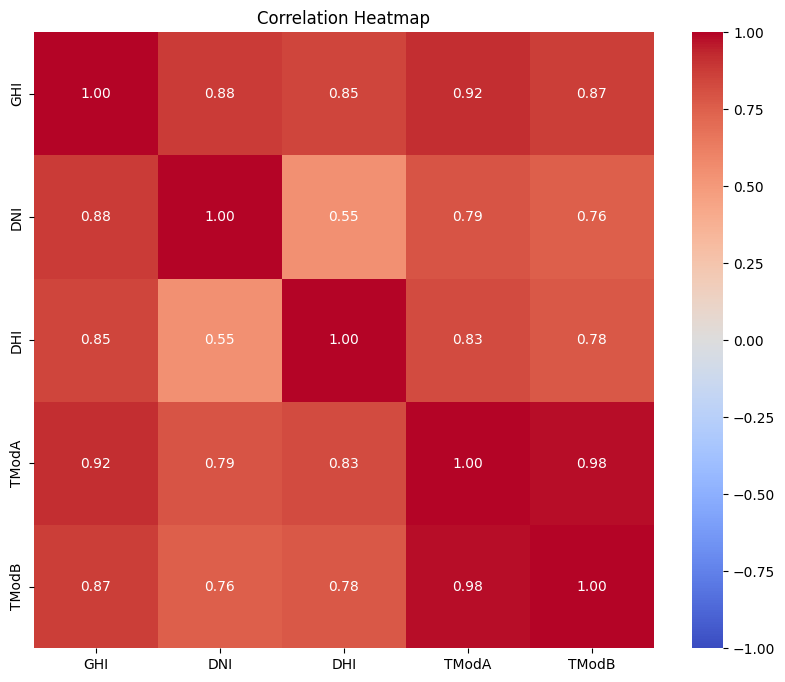

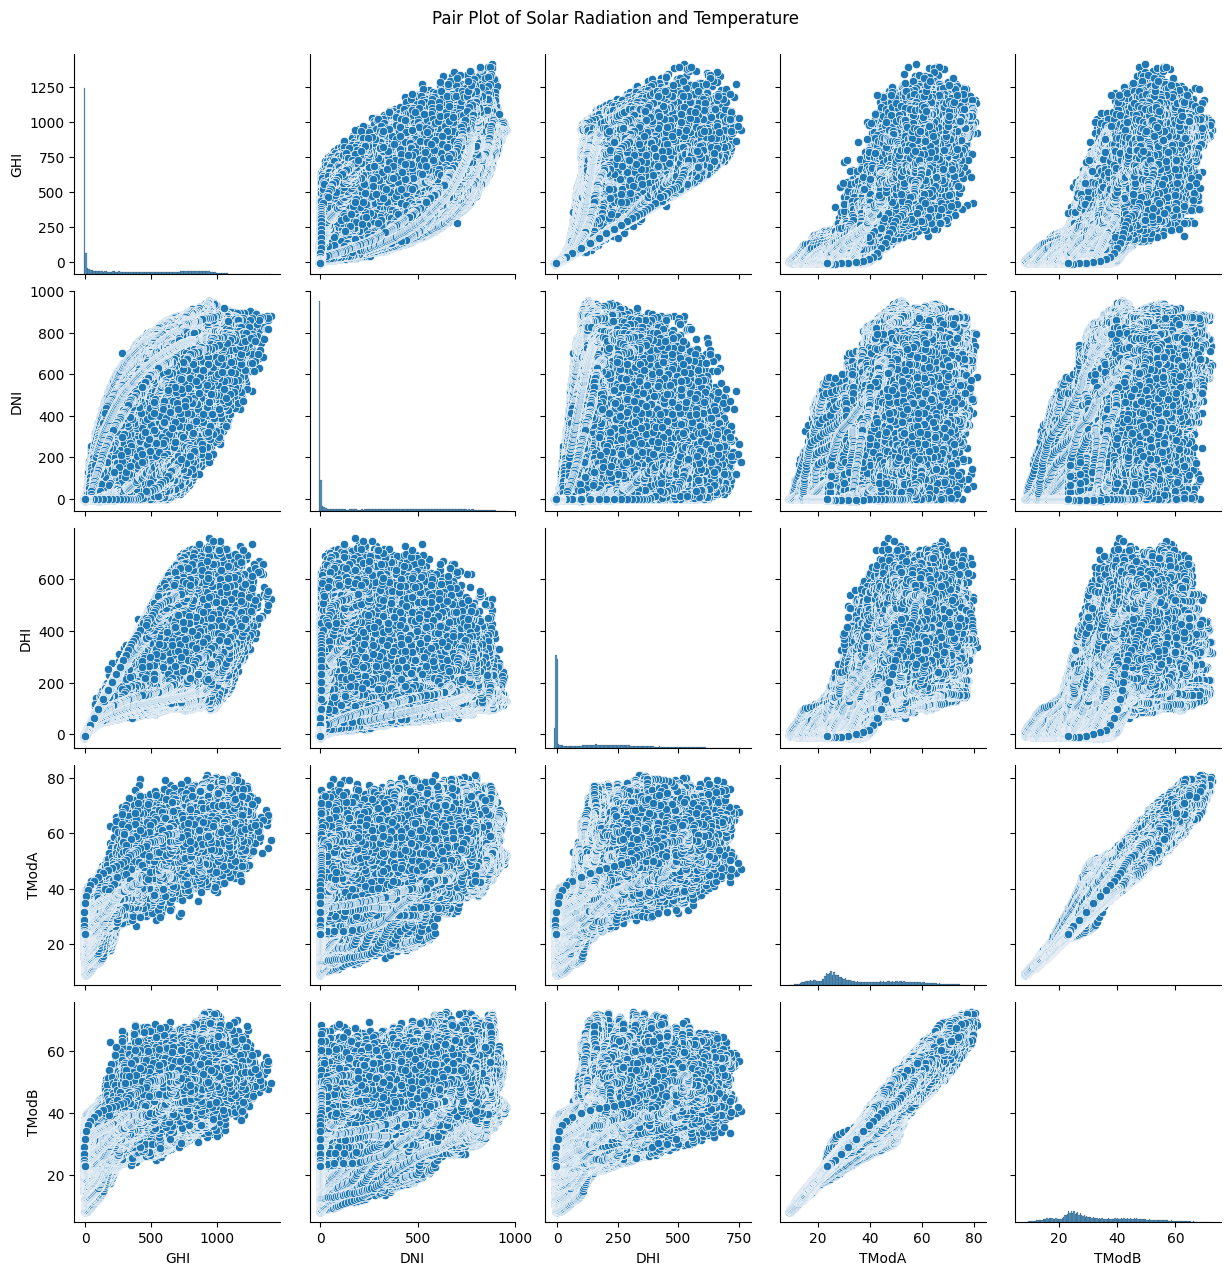

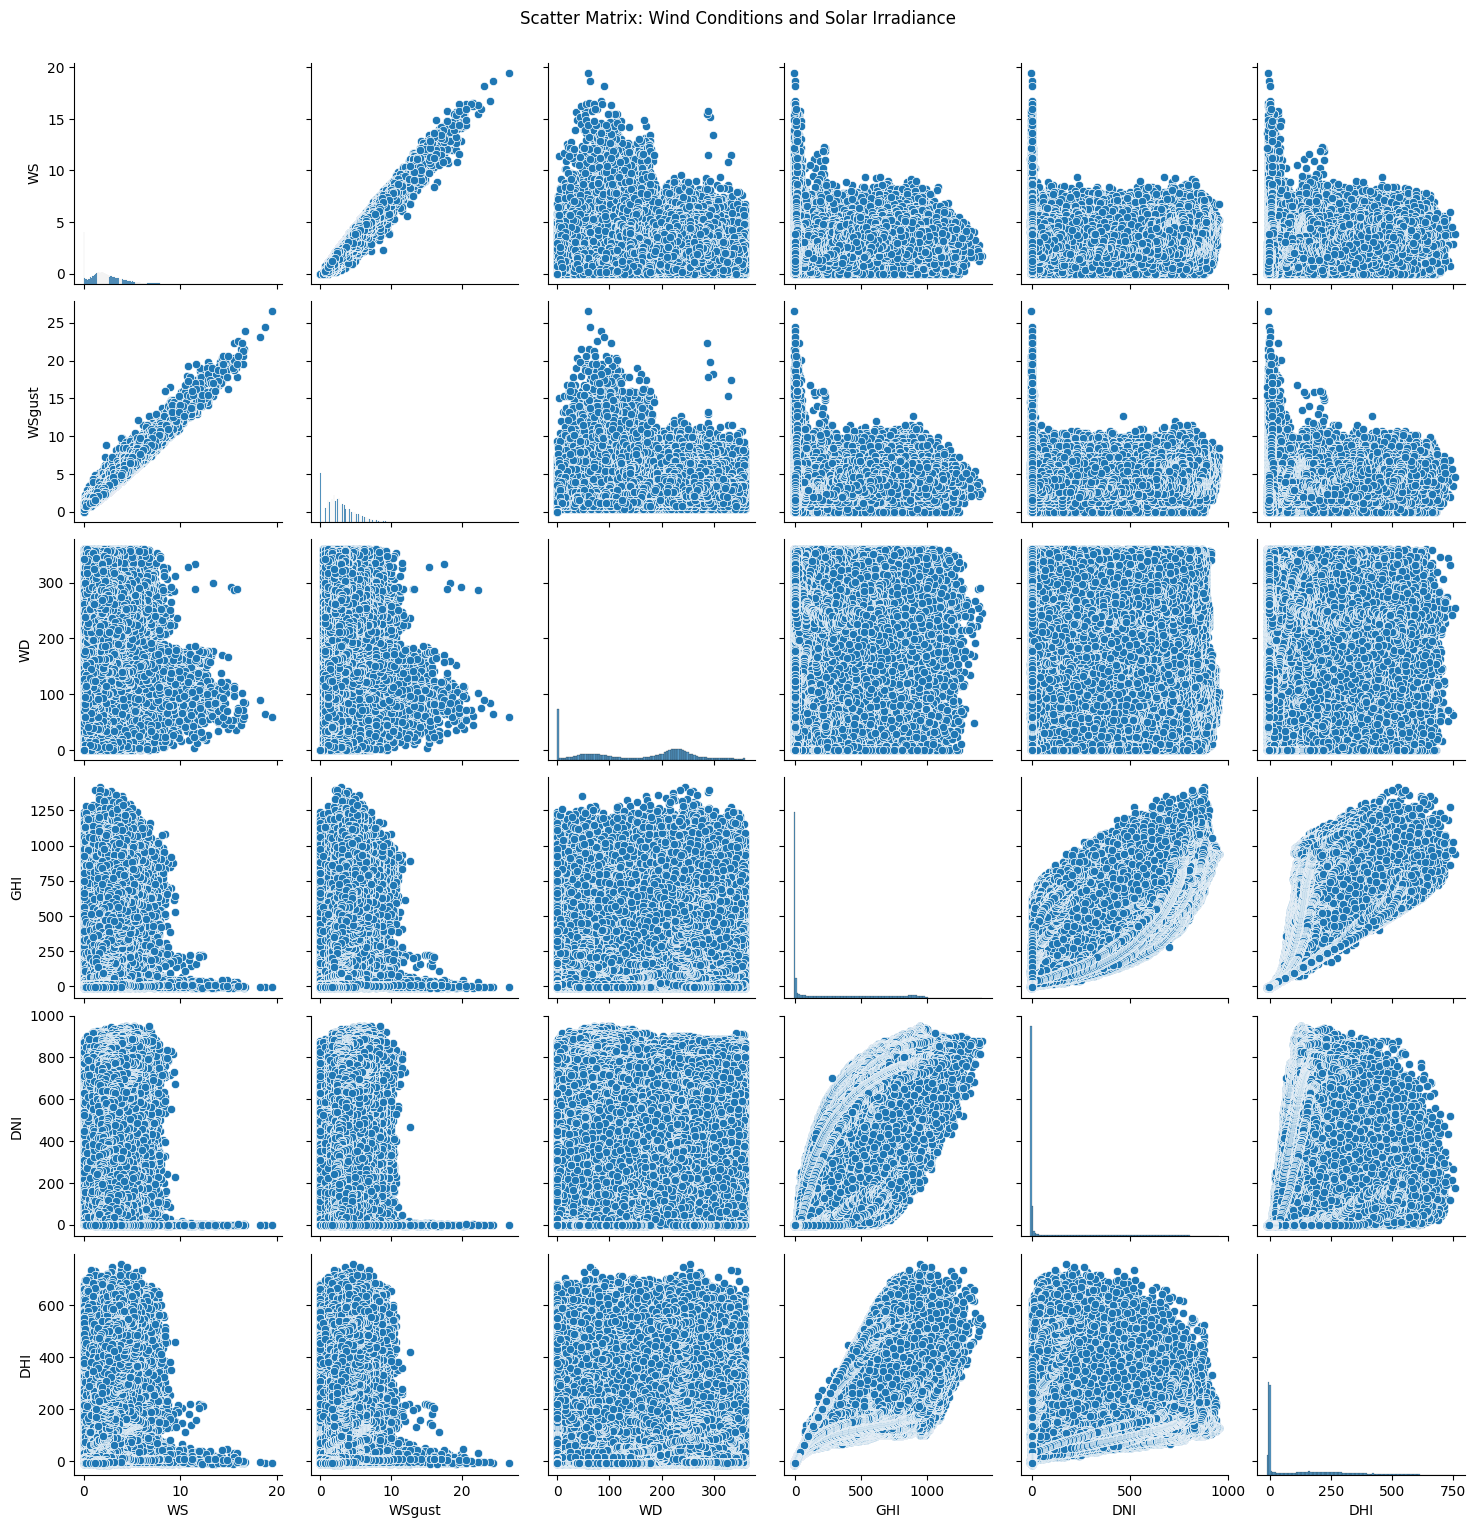

In [23]:
""" Correlation Analysis """

# Define the columns to include in the heatmap
columns_to_include = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plot_correlation_heatmap(benin_df, columns_to_include)

# Use the same columns for the pair plot
plot_pairplot(benin_df, columns_to_include)

# Define the wind-related columns
wind_columns = ['WS', 'WSgust', 'WD']
# Combine with irradiance columns for the scatter matrix
plot_wind_scatter_matrix(benin_df, wind_columns, ['GHI', 'DNI', 'DHI'])

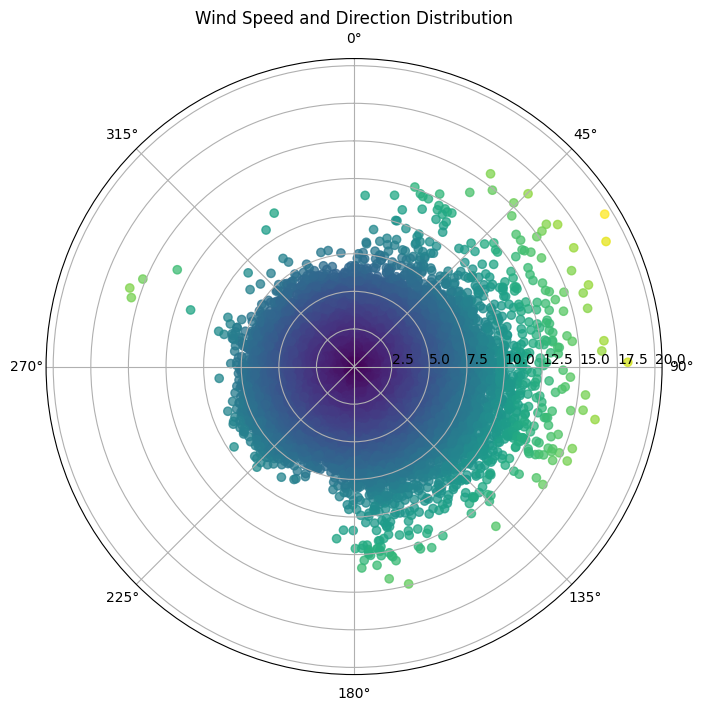

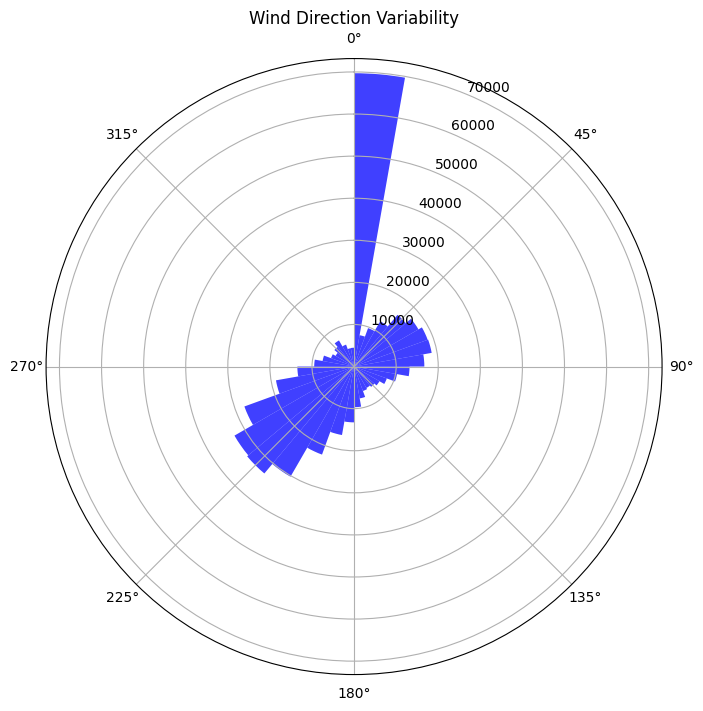

In [24]:
""" Wind Analysis """

# Call the function with your dataset
plot_wind_polar(benin_df, 'WS', 'WD')


# Call the function with your dataset
plot_wind_direction_variability(benin_df, 'WD')

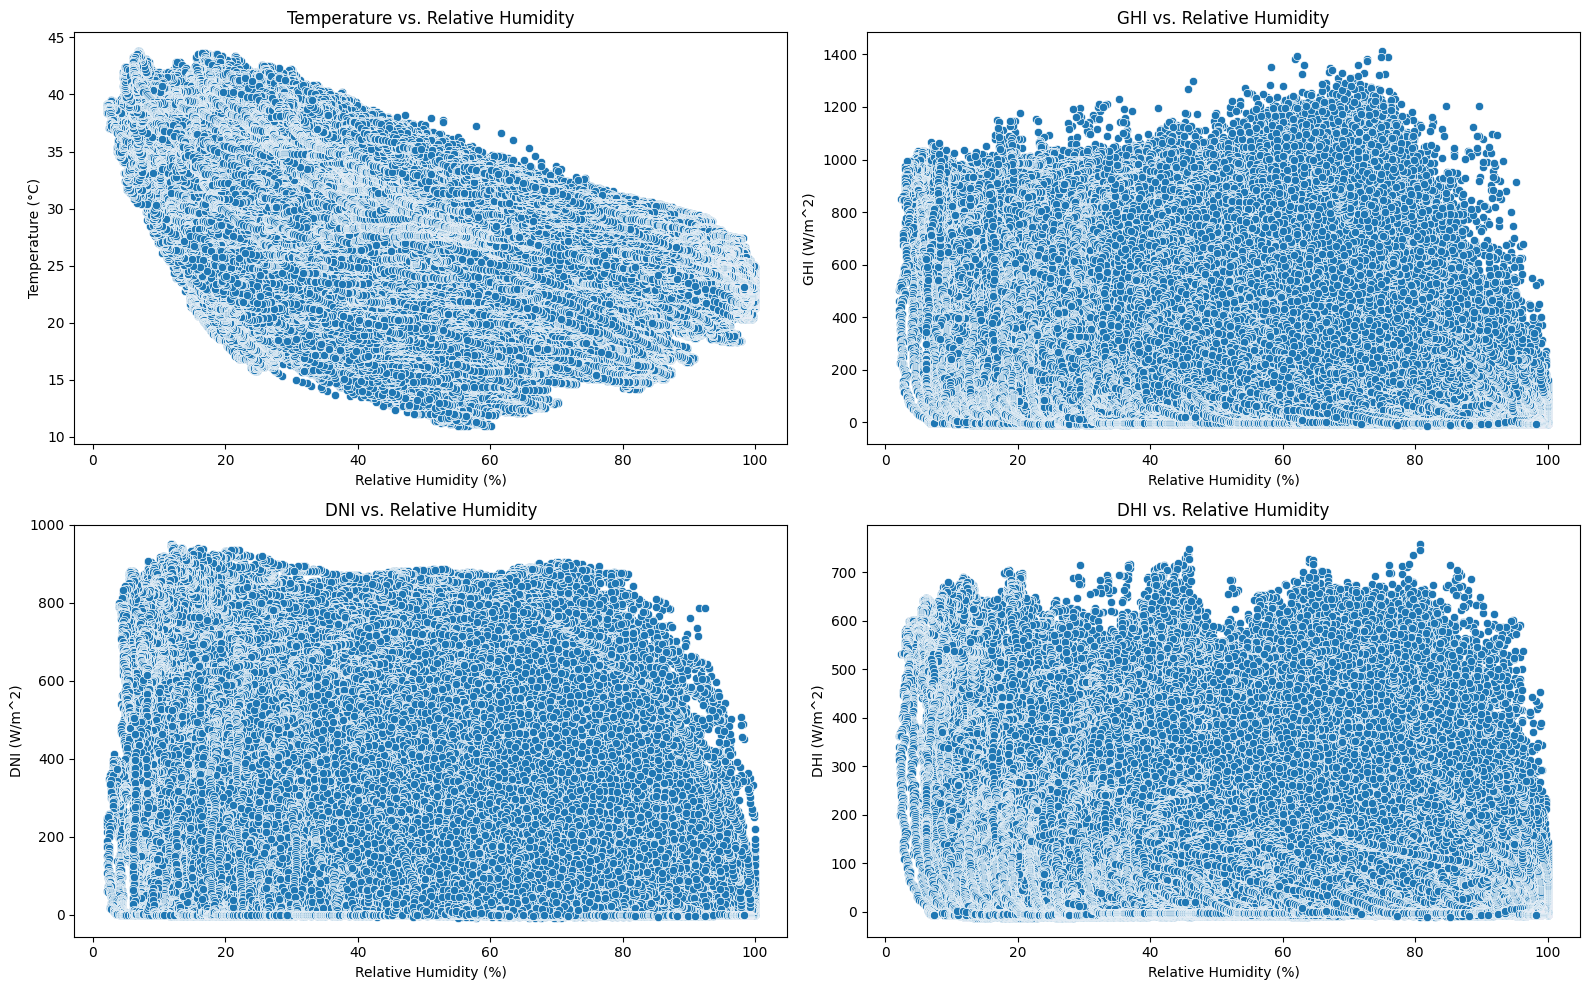

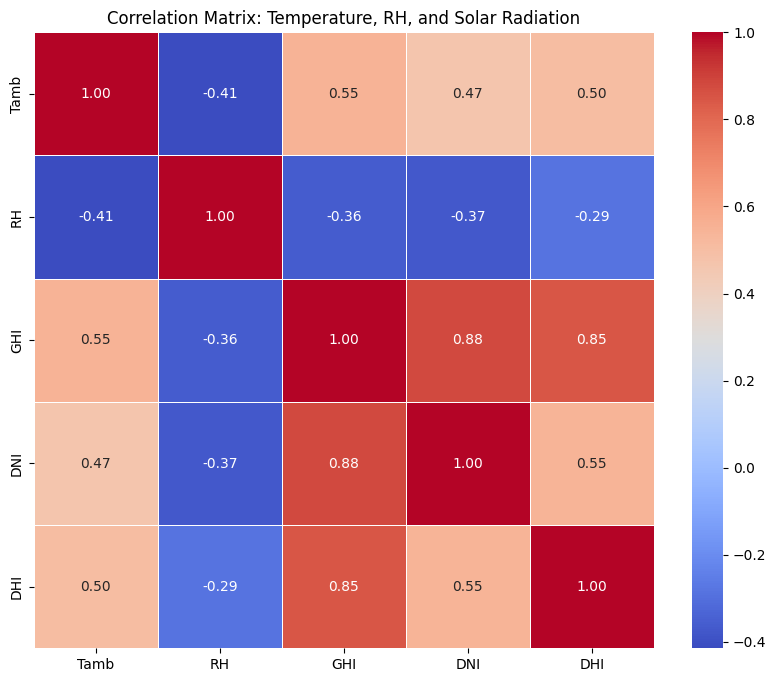

' To summarize:\nHigher relative humidity tends to lower temperature readings.\nand\nHigher relative humidity generally reduces solar radiation, affecting GHI, DNI, and DHI.\n\n '

In [25]:
"""Temperature Analysis"""

# Scatter plot to visualize relationship
plot_temperature_vs_rh(benin_df, 'Tamb', 'RH', 'GHI', 'DNI', 'DHI')

# Correlation Analysis
correlation_analysis(benin_df, ['Tamb', 'RH', 'GHI', 'DNI', 'DHI'])

""" To summarize:
Higher relative humidity tends to lower temperature readings.
and
Higher relative humidity generally reduces solar radiation, affecting GHI, DNI, and DHI.

 """


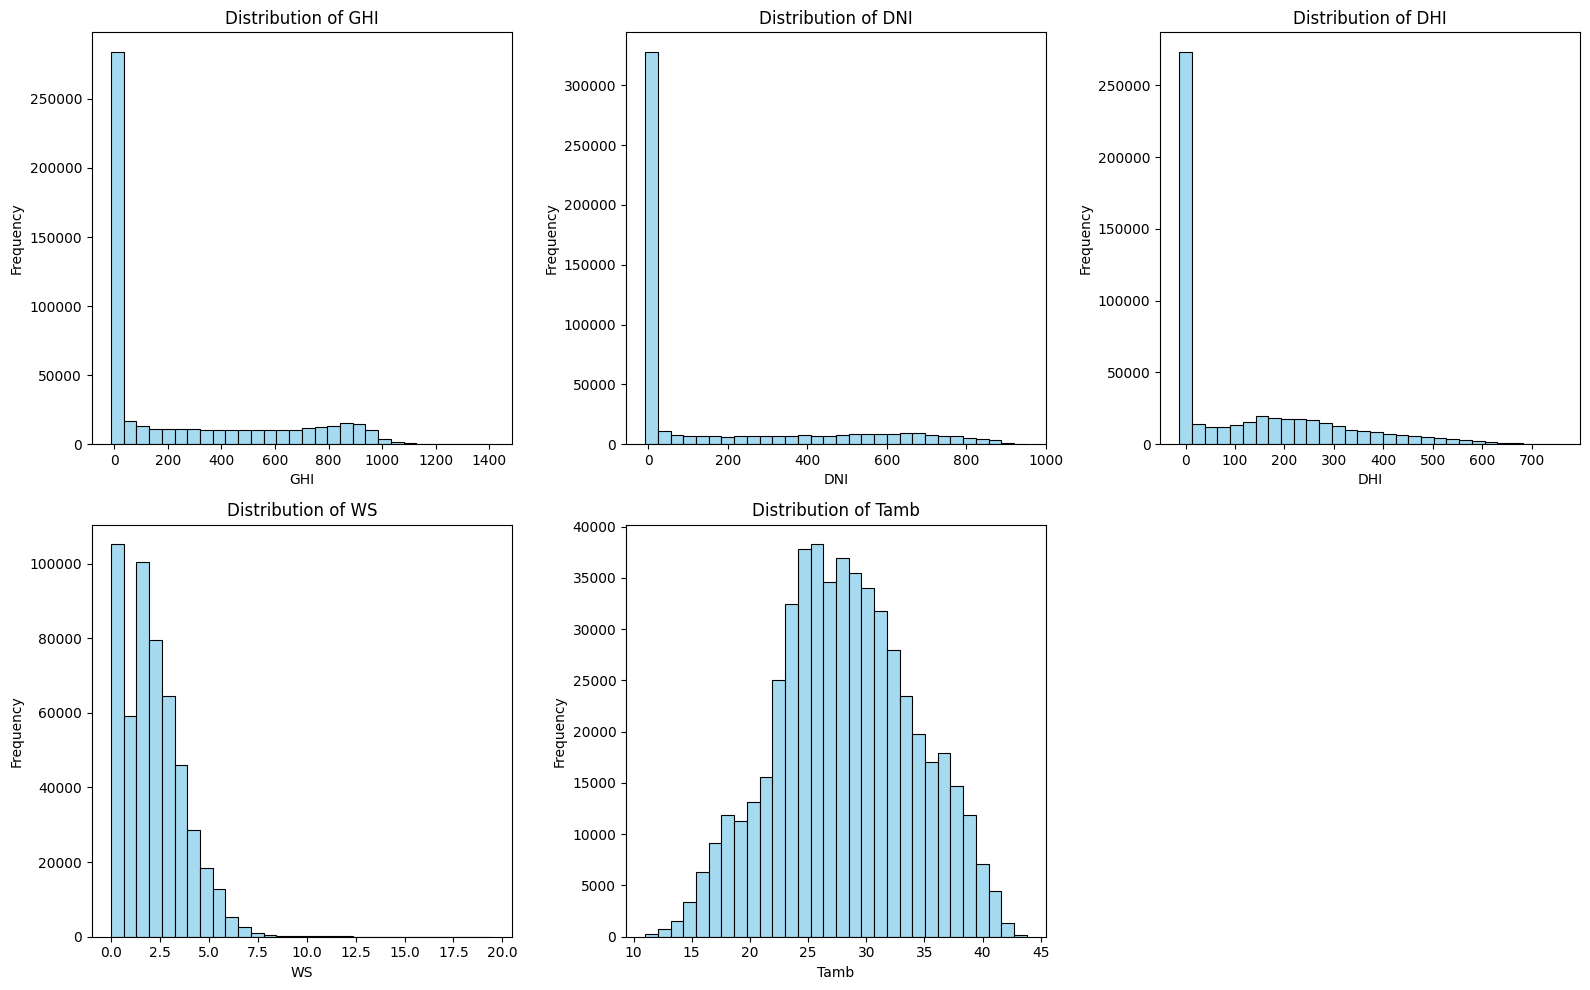

' \nGHI (Global Horizontal Irradiance): The distribution is skewed to the right, with most values concentrated at lower ranges and a long tail extending towards higher values.\n\nDNI (Direct Normal Irradiance): Similar to GHI, it shows a right-skewed distribution, indicating that higher values are less frequent.\n\nDHI (Diffuse Horizontal Irradiance): This exhibits a left-skewed distribution, meaning that most of the values are concentrated at the higher end, with a tail extending towards the lower values. This indicates that higher DHI values are more common, while lower values are less frequent.\n\nWS (Wind Speed): The distribution is less skewed compared to the irradiance variables, but still shows a higher frequency of lower wind speeds.\n\nTemperature (Tamb): This histogram has a more bell-shaped distribution, indicating a normal distribution centered around the mean temperature. '

In [26]:
""" Histogram """

# List of variables to plot histograms for
columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Plot histograms for the Benin dataset
plot_histograms(benin_df, columns)

""" 
GHI (Global Horizontal Irradiance): The distribution is skewed to the right, with most values concentrated at lower ranges and a long tail extending towards higher values.

DNI (Direct Normal Irradiance): Similar to GHI, it shows a right-skewed distribution, indicating that higher values are less frequent.

DHI (Diffuse Horizontal Irradiance): This exhibits a left-skewed distribution, meaning that most of the values are concentrated at the higher end, with a tail extending towards the lower values. This indicates that higher DHI values are more common, while lower values are less frequent.

WS (Wind Speed): The distribution is less skewed compared to the irradiance variables, but still shows a higher frequency of lower wind speeds.

Temperature (Tamb): This histogram has a more bell-shaped distribution, indicating a normal distribution centered around the mean temperature. """

In [27]:
""" Z-Score Analysis """

# List of variables to perform Z-score analysis on
columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS']

# Calculate Z-scores and flag outliers for the Benin dataset
benin_z_scores = calculate_z_scores(benin_df, columns)

# Display the flagged outliers
outliers = benin_df[benin_z_scores.filter(like='_outlier').any(axis=1)]
print("Outliers in the Benin dataset:")
print(outliers)

""" Z-Scores: Each variable (e.g., GHI, DNI) will have a corresponding Z-score column (e.g., GHI_z_score). The Z-score represents the number of standard deviations a data point is from the mean.

Outliers: The function will create a boolean column (e.g., GHI_outlier) for each variable, where True indicates that the data point is an outlier (i.e., its absolute Z-score is greater than the threshold).  """


Outliers in the Benin dataset:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670    2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672    2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673    2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
525105 2022-08-08 15:46:00     8.7   -0.2    8.6     9.0     8.8  21.7  98.7   
525107 2022-08-08 15:48:00     8.4   -0.1    8.3     8.8     8.6  21.7  98.7   
525119 2022-08-08 16:00:00     7.9    0.0    7.8     8.3     8.2  21.9  99.0   
525141 2022-08-08 16:22:00     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525151 2022-08-08 16:32:00     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   

        

' Z-Scores: Each variable (e.g., GHI, DNI) will have a corresponding Z-score column (e.g., GHI_z_score). The Z-score represents the number of standard deviations a data point is from the mean.\n\nOutliers: The function will create a boolean column (e.g., GHI_outlier) for each variable, where True indicates that the data point is an outlier (i.e., its absolute Z-score is greater than the threshold).  '

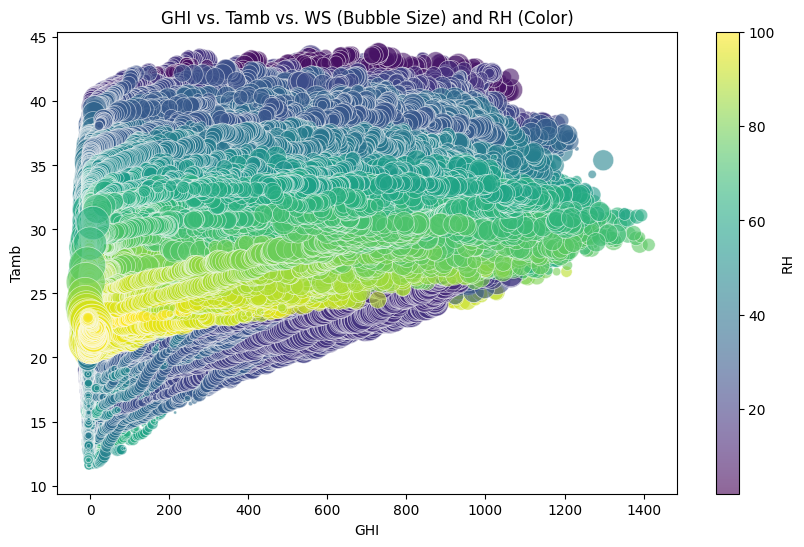

In [28]:
""" Bubble charts """

# Bubble chart of GHI vs. Tamb vs. WS, with bubble size representing RH (Relative Humidity)
plot_bubble_chart(
    df=benin_df, 
    x_column='GHI', 
    y_column='Tamb', 
    size_column='WS', 
    color_column='RH', 
    title='GHI vs. Tamb vs. WS (Bubble Size) and RH (Color)'
)

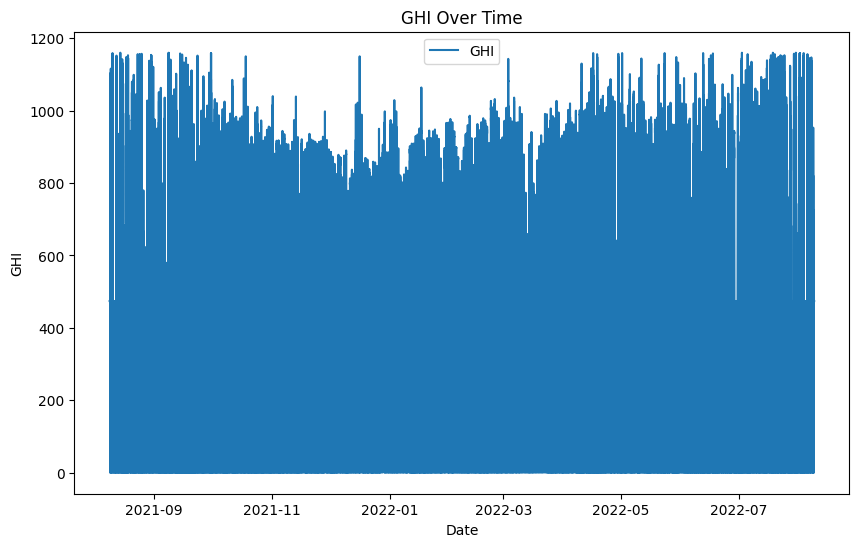

Timestamp    GHI    DNI    DHI  ModA  ModB  Tamb    RH   WS  \
0 2021-08-09 00:01:00  474.2  345.7  213.4   0.0   0.0  26.2  93.4  0.0   
1 2021-08-09 00:02:00  474.2  345.7  213.4   0.0   0.0  26.2  93.6  0.0   
2 2021-08-09 00:03:00  474.2  345.7  213.4   0.0   0.0  26.2  93.7  0.3   
3 2021-08-09 00:04:00  474.2  345.7  213.4   0.0   0.0  26.2  93.3  0.2   
4 2021-08-09 00:05:00  474.2  345.7  213.4   0.0   0.0  26.2  93.3  0.1   

   WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0     0.4      0.1  122.1      0.0  998         0            0.0   26.3   
1     0.0      0.0    0.0      0.0  998         0            0.0   26.3   
2     1.1      0.5  124.6      1.5  997         0            0.0   26.4   
3     0.7      0.4  120.3      1.3  997         0            0.0   26.4   
4     0.7      0.3  113.2      1.0  997         0            0.0   26.4   

   TModB  Comments  
0   26.2       NaN  
1   26.2       NaN  
2   26.2       NaN  
3   26.3       NaN  
4   26.3       NaN

In [29]:
""" Data Cleaning """

# Handle missing values
benin_df_cleaned= handle_missing_values(benin_df)

# Handle anomalies (e.g., negative values)
benin_df_cleaned = handle_anomalies(benin_df, columns=['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust'])

# Handle outliers
benin_df_cleaned = handle_outliers(benin_df, columns=['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust'])

import matplotlib.pyplot as plt

# Example: Plotting GHI vs. Time
plt.figure(figsize=(10, 6))
plt.plot(benin_df_cleaned['Timestamp'], benin_df_cleaned['GHI'], label='GHI')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.title('GHI Over Time')
plt.legend()
plt.show()

# Display the first few rows of the cleaned DataFrame
benin_df_cleaned.head()